(2000, 4096)


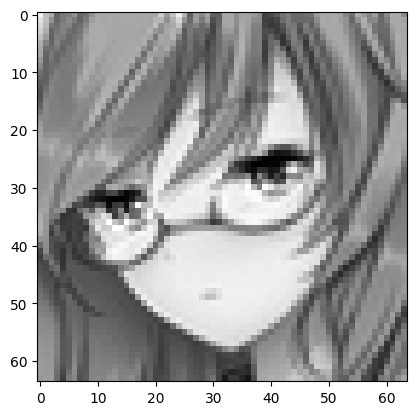

In [1]:
import numpy as np
import matplotlib.pyplot as plt

faces = np.loadtxt("anime_girls_2000x4096.csv", delimiter=',')
print(faces.shape)
plt.imshow(faces[0].reshape(64, 64), cmap='gray')

In [2]:
faces_centered = faces - faces.mean(axis=0)
faces_covariance = faces.shape[0]**-1 * faces_centered.T @ faces_centered

In [3]:
w, v = np.linalg.eigh(faces_covariance)

In [4]:
# save top 30 eigenfaces to csv
np.savetxt("eigenfaces.csv", v[:, ::-1][:, :30].T, delimiter=',')

In [5]:
# imshow eigenfaces
eigenfaces = np.loadtxt("eigenfaces.csv", delimiter=',')
eigenfaces.shape

(30, 4096)

In [6]:
(eigenfaces - eigenfaces.min(axis=1, keepdims=True)).shape

(30, 4096)

In [7]:
eigenfaces = (eigenfaces - eigenfaces.min(axis=1, keepdims=True)) / (eigenfaces.max(axis=1, keepdims=True) - eigenfaces.min(axis=1, keepdims=True)) * 255
eigenfaces = eigenfaces.astype(np.uint8)
print(eigenfaces[0].min(), eigenfaces[0].max())

np.savetxt("eigenfaces-norm.csv", eigenfaces, delimiter=',', fmt='%i')

0 255


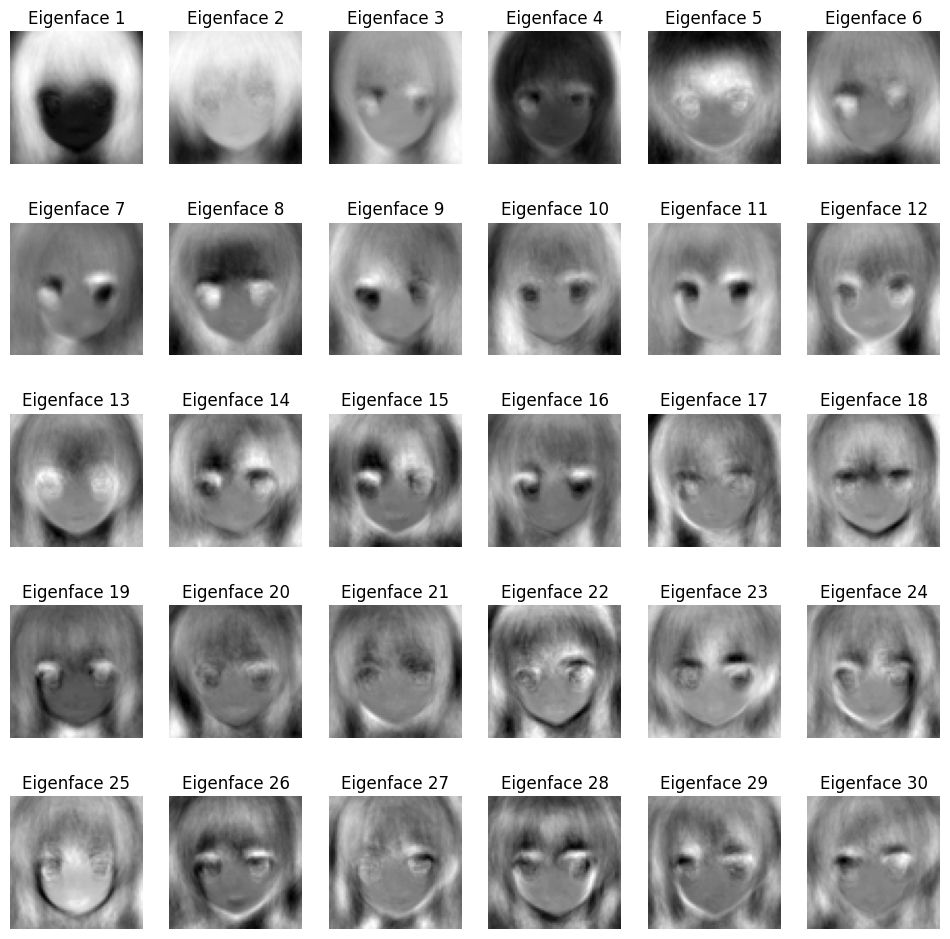

In [8]:
fig, axes = plt.subplots(5, 6, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i].reshape(64, 64), cmap='gray')
    ax.set_title(f'Eigenface {i+1}')
    ax.axis('off')

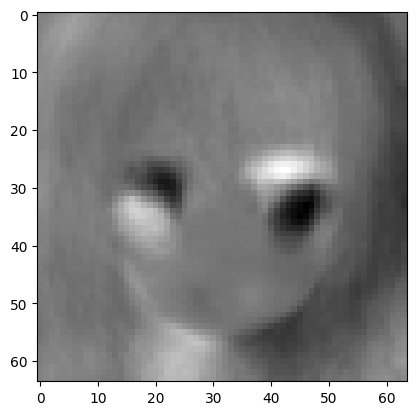

In [11]:
plt.imshow(eigenfaces[6].reshape(64, 64), cmap='gray')

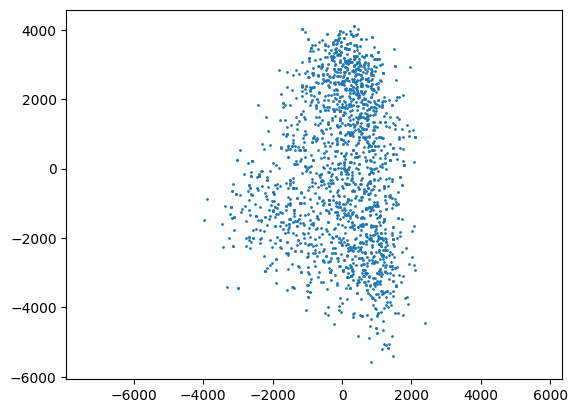

In [21]:
# project face data onto the two top eigenvectors
faces_projected = faces_centered @ v[:, [-2, -1]]
# force same axis scaling
plt.axis('equal')
plt.scatter(faces_projected[:, 0], faces_projected[:, 1], s=1)

In [22]:
faces_projected

array([[  786.54244984, -1095.00524085],
       [ 1197.31670669, -2679.21975611],
       [  685.1178661 , -3364.21340319],
       ...,
       [  450.56576823,    -4.68944725],
       [-1032.44527944,   999.13893364],
       [ -488.71562334,  3228.69069644]])

In [1]:
faces_centered

NameError: name 'faces_centered' is not defined

In [31]:
projected_data[:, 0].min(), projected_data[:, 0].max()

(-3989.254969466478, 2400.675409570579)

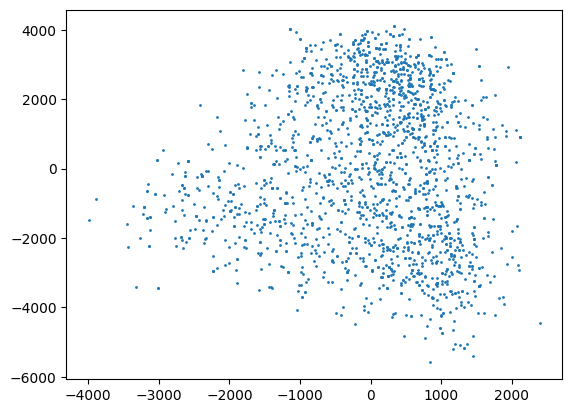

In [29]:
projected_data = np.loadtxt("projected-data.csv", delimiter=',')
plt.scatter(projected_data[:, 0], projected_data[:, 1], s=1)